<a href="https://colab.research.google.com/github/shrutikannan01/github-test/blob/main/REALTIME_TWITTER_SENTIMENT_ANALYSIS_bjp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tweepy
from tweepy import OAuthHandler

In [22]:
consumer_key = "uWXAuFZd52csrXeBI8wkZxu3c"
consumer_secret = "MYF7A9kGBseG6uDDLEq1qBtgovB7ndXp2ShYZ4CMfOzDlwOlfc"
access_token = "1262289493354115079-yVWIlNEknSg16Tzxwxjz4Jg0D4xV2Z"
access_token_secret = "wjJ1mqnkmfT1rEmI0e0NTpA2T4r2biQwJDhpiKqZqpiY9"
#bearer="AAAAAAAAAAAAAAAAAAAAAAuVfAEAAAAA3rEmT55O0152SUaMz3Io1w8QJnk%3Dpw1iNiCTkBVktVIzw2N0L1sIfcxKKsCGxFhwZsO81WPPIfGljG"


In [23]:
auth = tweepy.OAuthHandler( consumer_key , consumer_secret )
auth.set_access_token( access_token , access_token_secret )
api = tweepy.API(auth)

In [24]:
df = pd.DataFrame(columns=["Date","User","IsVerified","Tweet","Likes","RT",'User_location'])
print(df)

Empty DataFrame
Columns: [Date, User, IsVerified, Tweet, Likes, RT, User_location]
Index: []


In [25]:
def get_tweets(Topic,Count):    
    i=0
    for tweet in tweepy.Cursor(api.search, q=Topic,count=100, lang="en",exclude='retweets').items():
        print(i, end='\r')
        df.loc[i,"Date"] = tweet.created_at
        df.loc[i,"User"] = tweet.user.name
        df.loc[i,"IsVerified"] = tweet.user.verified
        df.loc[i,"Tweet"] = tweet.text
        df.loc[i,"Likes"] = tweet.favorite_count
        df.loc[i,"RT"] = tweet.retweet_count
        df.loc[i,"User_location"] = tweet.user.location
        #df.to_csv("TweetDataset.csv",index=False)
        df.to_excel('{}.xlsx'.format("TweetDataset"),index=False)   
        i=i+1
        if i>Count:
            break
        else:
            pass

In [47]:
Topic=["bjp"]
get_tweets(Topic , Count=100)

In [48]:
df.head(8)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet,Sentiment
0,2022-10-16 06:17:22,NISHIT DESAI-A HINDU LION ( शेर )- For Nupur &...,False,@drshamamohd @narendramodi Disregarding the cr...,0,0,INDIA,twt kim seokjin i m voting for twt for favorit...,Positive
1,2022-10-16 06:17:12,sachinprashad,False,@Maruthi0305 @BJP4India @BJP4Telangana Power f...,0,0,"Hyderabad, India Bhagyanagar",11 i m voting bts twt for favorite pop duo or ...,Positive
2,2022-10-16 06:17:12,India News Online,False,BJP’s central leadership pleased with Basavara...,0,0,,bighit oh my god oh my god thank you i love you,Positive
3,2022-10-16 06:17:07,Th(read me)ssage,False,@news24tvchannel any doubt if @aimim_national ...,0,0,The lane next to you,twt i m voting for twt for favorite pop duo or...,Positive
4,2022-10-16 06:17:05,Vijaysingh Chikne,False,@kanishkajadhav Bjp n congress are same .. the...,0,0,,i m voting for twt for favorite pop duo or gro...,Positive
5,2022-10-16 06:17:03,Akshay Alladi,False,@TheWand68425335 @Me_Predictor @anindian24 @SP...,1,0,"Bengaluru, India",kim namjoon i m voting for bts twt for favorit...,Positive
6,2022-10-16 06:16:57,Hridesh Mishra #LAVA Blaze 5G,False,@rohan10203070 @divya_gandotra As currently I ...,0,0,,last night feels like a fever dream like watch...,Positive
7,2022-10-16 06:16:51,Amol MY,False,@t_d_h_nair Our External Affairs ministers are...,0,0,"Mumbai, India",joonie via instagram feed,Neutral


In [49]:
import re
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([RT])', ' ', str(tweet).lower()).split())

In [50]:
from textblob import TextBlob
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [51]:
def prepCloud(Topic_text,Topic):
    Topic = str(Topic).lower()
    Topic=' '.join(re.sub('([^0-9A-Za-z \t])', ' ', Topic).split())
    Topic = re.split("\s+",str(Topic))
    stopwords = set(STOPWORDS)
    stopwords.update(Topic) ### Add our topic in Stopwords, so it doesnt appear in wordClous
    ###
    text_new = " ".join([txt for txt in Topic_text.split() if txt not in stopwords])
    return text_new

In [52]:
df['clean_tweet'] = df['Tweet'].apply(lambda x : clean_tweet(x))
df.head(5)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet,Sentiment
0,2022-10-16 06:17:22,NISHIT DESAI-A HINDU LION ( शेर )- For Nupur &...,False,@drshamamohd @narendramodi Disregarding the cr...,0,0,INDIA,disregarding the criticisms since 2014 why is ...,Positive
1,2022-10-16 06:17:12,sachinprashad,False,@Maruthi0305 @BJP4India @BJP4Telangana Power f...,0,0,"Hyderabad, India Bhagyanagar",power full people only bjp leader great,Positive
2,2022-10-16 06:17:12,India News Online,False,BJP’s central leadership pleased with Basavara...,0,0,,bjp s central leadership pleased with basavara...,Positive
3,2022-10-16 06:17:07,Th(read me)ssage,False,@news24tvchannel any doubt if @aimim_national ...,0,0,The lane next to you,any doubt if national is not b team of bjp,Positive
4,2022-10-16 06:17:05,Vijaysingh Chikne,False,@kanishkajadhav Bjp n congress are same .. the...,0,0,,bjp n congress are same they decided we both t...,Positive


In [53]:
df["Sentiment"] = df["Tweet"].apply(lambda x : analyze_sentiment(x))
df.head(5)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet,Sentiment
0,2022-10-16 06:17:22,NISHIT DESAI-A HINDU LION ( शेर )- For Nupur &...,False,@drshamamohd @narendramodi Disregarding the cr...,0,0,INDIA,disregarding the criticisms since 2014 why is ...,Negative
1,2022-10-16 06:17:12,sachinprashad,False,@Maruthi0305 @BJP4India @BJP4Telangana Power f...,0,0,"Hyderabad, India Bhagyanagar",power full people only bjp leader great,Positive
2,2022-10-16 06:17:12,India News Online,False,BJP’s central leadership pleased with Basavara...,0,0,,bjp s central leadership pleased with basavara...,Positive
3,2022-10-16 06:17:07,Th(read me)ssage,False,@news24tvchannel any doubt if @aimim_national ...,0,0,The lane next to you,any doubt if national is not b team of bjp,Neutral
4,2022-10-16 06:17:05,Vijaysingh Chikne,False,@kanishkajadhav Bjp n congress are same .. the...,0,0,,bjp n congress are same they decided we both t...,Neutral


In [54]:
n = 15
print("Original tweet:\n",df['Tweet'][n])
print()
print("Clean tweet:\n",df['clean_tweet'][n])
print()
print("Sentiment of the tweet:\n",df['Sentiment'][n])

Original tweet:
 @scroll_in Toppling govt on re strength was bjp claim. Now brushing aside. Nautanki-Jumla Company. Sanghi Group of companies.

Clean tweet:
 in toppling govt on re strength was bjp claim now brushing aside nautanki jumla company sanghi group of companies

Sentiment of the tweet:
 Neutral


In [55]:
print("Total Tweets Extracted for Topic : {} are : {}".format(Topic,len(df.Tweet)))
print("Total Positive Tweets are : {}".format(len(df[df["Sentiment"]=="Positive"])))
print("Total Negative Tweets are : {}".format(len(df[df["Sentiment"]=="Negative"])))
print("Total Neutral Tweets are : {}".format(len(df[df["Sentiment"]=="Neutral"])))

Total Tweets Extracted for Topic : ['bjp'] are : 101
Total Positive Tweets are : 30
Total Negative Tweets are : 21
Total Neutral Tweets are : 50


In [56]:
df["Sentiment"].value_counts()

Neutral     50
Positive    30
Negative    21
Name: Sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Summary of Counts for Total tweets')

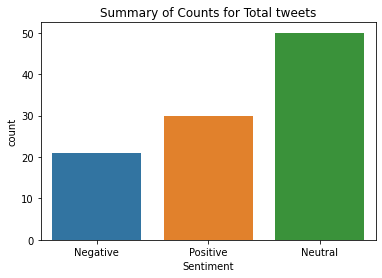

In [57]:
sns.countplot(df["Sentiment"])
plt.title("Summary of Counts for Total tweets")

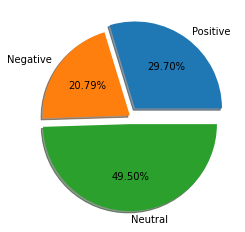

In [58]:
a=len(df[df["Sentiment"]=="Positive"])
b=len(df[df["Sentiment"]=="Negative"])
c=len(df[df["Sentiment"]=="Neutral"])
d=np.array([a,b,c])
explode = (0.1, 0.0, 0.1)
plt.pie(d,shadow=True,explode=explode,labels=["Positive","Negative","Neutral"],autopct='%1.2f%%');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not')

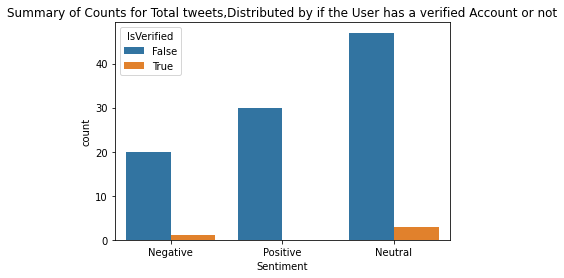

In [59]:
sns.countplot(df["Sentiment"],hue=df.IsVerified)
plt.title("Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not")

In [60]:
#wordchart
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

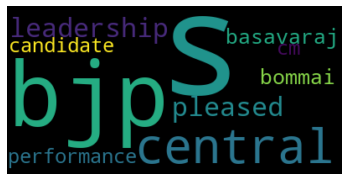

In [61]:
text = df.clean_tweet[2]

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=10).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 8242 words in the combination of all review.


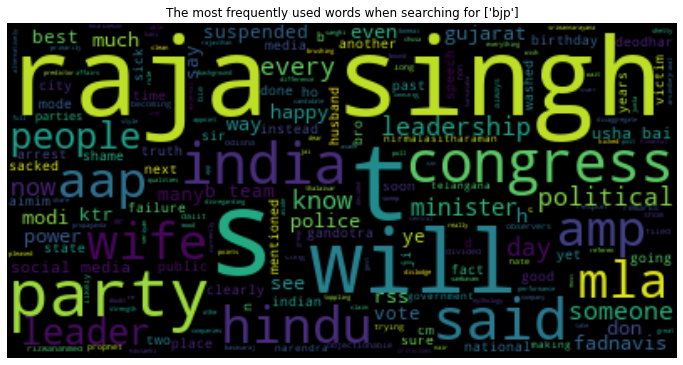

In [62]:
text = " ".join(review for review in df.clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

text_newALL = prepCloud(text,Topic)


# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_newALL)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic),)
plt.axis("off")
plt.show()

There are 8242 words in the combination of all review.


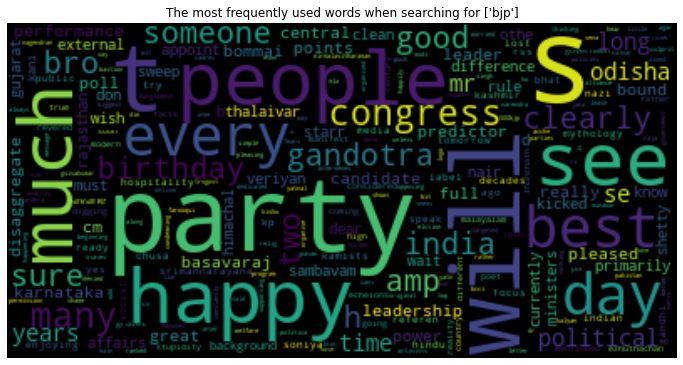

In [63]:
#ONLY POSITIVE WORDS
text_positive = " ".join(review for review in df[df["Sentiment"]=="Positive"].clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["and", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords
#text_positive=" ".join([word for word in text_positive.split() if word not in stopwords])

text_new_positive = prepCloud(text_positive,Topic)

#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_new_positive)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic))
plt.axis("off")
plt.show()

There are 8242 words in the combination of all review.


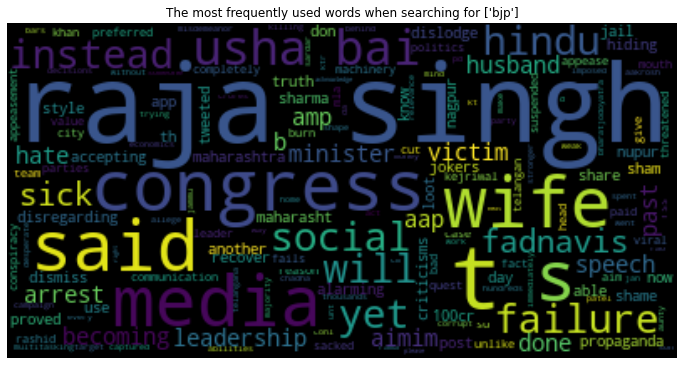

In [64]:
#ONLY NEGATIVE TWEETS
text_negative = " ".join(review for review in df[df["Sentiment"]=="Negative"].clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["and", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

#text_negative=" ".join([word for word in text_negative.split() if word not in stopwords])
text_new_negative = prepCloud(text_negative,Topic)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_new_negative)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic))
plt.axis("off")
plt.show()